In [2]:
''' Pandas - работа с csv '''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
''' Чтение csv и запись их в переменные '''
rootpath = "/Users/nikita/Documents/python_3_filies/ML/ML_sound_1/data/"

fourier_data = pd.read_csv(rootpath+"fourier_samples.csv", delimiter=',', sep='\t')
fourier_data_Eee_1 = pd.read_csv(rootpath+"fourier_Eee_1.csv", delimiter=',', sep='\t')
fourier_data_o = pd.read_csv(rootpath+"fourier_samples_o.csv", delimiter=',', sep='\t')
fourier_data_filler = pd.read_csv(rootpath+"fourier_filler_train.csv", delimiter=',', sep='\t')
fourier_data_a_train = pd.read_csv(rootpath+"fourier_a_train.csv", delimiter=',', sep='\t')
filler_zori_1= pd.read_csv(rootpath+"filler_zori_1.csv", delimiter=',', sep='\t')
Eee_long_1 = pd.read_csv(rootpath+"Eee_long_1.csv", delimiter=',', sep='\t')



In [8]:
#Eee_long_1

In [9]:
''' Получение массива из строк (рядов) '''
rows = fourier_data.iterrows()
rows = list(rows)
rows_o = fourier_data_o.iterrows()
rows_o = list(rows_o)
rows_filler = fourier_data_filler.iterrows()
rows_filler = list(rows_filler)
rows_a_train = fourier_data_a_train.iterrows()
rows_a_train = list(rows_a_train)
rows_Eee_1 = fourier_data_Eee_1.iterrows()
rows_Eee_1 = list(rows_Eee_1)
rows_filler_zori_1 = filler_zori_1.iterrows()
rows_filler_zori_1 = list(rows_filler_zori_1)
rows_Eee_long_1 = Eee_long_1.iterrows()
rows_Eee_long_1 = list(rows_Eee_long_1)

In [10]:
''' Фурье-семплы "Э" - обучение '''
samples_eee = []
for index,i in enumerate(rows):
    samples_eee.append([])
    for j in i:
        #print(j)
        samples_eee[index].append(j)

In [11]:
''' Фурье семплы "О" - обучение '''
samples_o = []
for index,i in enumerate(rows_o):
    samples_o.append([])
    for j in i:
        #print(index, j)
        samples_o[index].append(j)

In [12]:
''' Фурье-семплы "привет"  filler - наполнитель (англ.) - обучение '''
samples_filler = []
for index,i in enumerate(rows_filler):
    samples_filler.append([])
    for j in i:
        #print(index, j)
        samples_filler[index].append(j)

In [13]:
''' Фурье-семплы "А" - обучение '''
samples_a_train = []
for index,i in enumerate(rows_a_train):
    samples_a_train.append([])
    for j in i:
        #print(index, j)
        samples_a_train[index].append(j)

In [14]:
''' Фурье-семплы "ЭЭЭЭ " - обучение '''
samples_Eee_1 = []
for index,i in enumerate(rows_Eee_1):
    samples_Eee_1.append([])
    for j in i:
        #print(index, j)
        samples_Eee_1[index].append(j)

In [15]:
''' Фурье-семплы filler_zori_1 - обучение '''
samples_filler_zori_1 = []
for index,i in enumerate(rows_filler_zori_1):
    samples_filler_zori_1.append([])
    for j in i:
        #print(index, j)
        samples_filler_zori_1[index].append(j)

In [16]:
''' Фурье-семплы "ЭЭЭЭ " - обучение '''
samples_Eee_long_1 = []
for index,i in enumerate(rows_Eee_long_1):
    samples_Eee_long_1.append([])
    for j in i:
        #print(index, j)
        samples_Eee_long_1[index].append(j)

In [17]:
''' Обрезка первого фурье-семпла, т.к. он не предоставляет ценности '''
s_e = [samples_eee[i][1][1:] for i in range(len(samples_eee))]
s_o = [samples_o[i][1][1:] for i in range(len(samples_o))]
s_filler = [samples_filler[i][1][1:] for i in range(len(samples_filler))]
s_a_train = [samples_a_train[i][1][1:] for i in range(len(samples_a_train))]
s_Eee_1 = [samples_Eee_1[i][1][1:] for i in range(len(samples_Eee_1))]
s_filler_zori_1 = [samples_filler_zori_1[i][1][1:] for i in range(len(samples_filler_zori_1))]
s_Eee_long_1 = [samples_Eee_long_1[i][1][1:] for i in range(len(samples_Eee_long_1))]

In [18]:
from sklearn.model_selection import train_test_split

In [22]:
len(s_Eee_long_1)

1348

In [193]:
''' Собсна) фичи и лейблы:  э - "1", а - "-1", остальное - "0" '''
features = s_e+s_filler+s_o+s_a_train+s_Eee_long_1+s_filler_zori_1 #+s_Eee_1
lables = [10]*len(s_e)+[0]*len(s_filler)+[0]*len(s_o)+[0]*len(s_a_train)+[10]*len(s_Eee_long_1)+[0]*len(s_filler_zori_1)

''' Numpy массив фич и лейблов '''
X = np.array(features)
y = np.array(lables)

In [194]:
''' Разбиение фич и лейблов на train и test для теста на точность '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [195]:
''' Различные методы для машинного обучения '''
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


In [198]:
''' Модель классификатора или регрессора '''
clf = DecisionTreeClassifier()#SVR(kernel='rbf', C=1e3, gamma=0.1)() # MLPRegressor(activation='tanh') #SVR(kernel='rbf', C=1e3, gamma=0.1) #RandomForestClassifier() # DecisionTreeRegressor(max_depth=100) 


In [199]:
''' Обучение '''
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [200]:
''' Точность, она тут немного не честная '''
acc = clf.score(X_test,y_test)
acc

1.0

#  а вот теперь становится интересно
распознавание

In [201]:
''' Данные для распознавания '''
rootpath = "/Users/nikita/Documents/python_3_filies/ML/ML_sound_1/data/"
fourier_data_e_test = pd.read_csv(rootpath+"fourier_samples_e_test.csv", delimiter=',', sep='\t')
fourier_data_o_test = pd.read_csv(rootpath+"fourier_samples_o_test.csv", delimiter=',', sep='\t')
fourier_data_a_test = pd.read_csv(rootpath+"fourier_samples_a_test.csv", delimiter=',', sep='\t')
fourier_data_i_test = pd.read_csv(rootpath+"fourier_i_test.csv", delimiter=',', sep='\t')
fourier_vot_e = pd.read_csv(rootpath+"fourier_vot_e.csv", delimiter=',', sep='\t')
fourier_eks = pd.read_csv(rootpath+"fourier_eks.csv", delimiter=',', sep='\t')
Eee_test_1 = pd.read_csv(rootpath+"Eee_test_1.csv", delimiter=',',sep='\t')



In [202]:
''' Получение массива из строк (рядов) '''
rows_e_test = fourier_data_e_test.iterrows()
rows_e_test = list(rows_e_test)
rows_o_test = fourier_data_o_test.iterrows()
rows_o_test = list(rows_o_test)
rows_a_test = fourier_data_a_test.iterrows()
rows_a_test = list(rows_a_test)
rows_i_test = fourier_data_i_test.iterrows()
rows_i_test = list(rows_i_test)
rows_vot_e = fourier_vot_e.iterrows()
rows_vot_e = list(rows_vot_e)
rows_eks = fourier_eks.iterrows()
rows_eks = list(rows_eks)
rows_Eee_test_1 = Eee_test_1.iterrows()
rows_Eee_test_1 = list(rows_Eee_test_1)




In [203]:
''' Фурье-семпл "Э" - тест '''
samples_e_test = []
for index,i in enumerate(rows_e_test):
    samples_e_test.append([])
    for j in i:
        samples_e_test[index].append(j)

In [204]:
''' Фурье-семпл "О" - тест '''
samples_o_test = []
for index,i in enumerate(rows_o_test):
    samples_o_test.append([])
    for j in i:
        #print(index, j)
        samples_o_test[index].append(j)

In [205]:
''' Фурье-семпл "А" - тест '''
samples_a_test = []
for index,i in enumerate(rows_a_test):
    samples_a_test.append([])
    for j in i:
        #print(index, j)
        samples_a_test[index].append(j)

In [206]:
''' Фурье-семпл "И" - тест '''
samples_i_test = []
for index,i in enumerate(rows_i_test):
    samples_i_test.append([])
    for j in i:
        #print(index, j)
        samples_i_test[index].append(j)

In [207]:
''' Фурье-семпл чего-то)) - тест '''
samples_vot_e = []
for index,i in enumerate(rows_vot_e):
    samples_vot_e.append([])
    for j in i:
        #print(index, j)
        samples_vot_e[index].append(j)

In [208]:
''' Фурье-семпл "Эээксаватора" - тест '''
samples_eks = []
for index,i in enumerate(rows_eks):
    samples_eks.append([])
    for j in i:
        #print(index, j)
        samples_eks[index].append(j)

In [209]:
''' Фурье-семпл "Эээксаватора" - тест '''
samples_Eee_test_1 = []
for index,i in enumerate(rows_Eee_test_1):
    samples_Eee_test_1.append([])
    for j in i:
        #print(index, j)
        samples_Eee_test_1[index].append(j)

In [210]:
len(samples_Eee_test_1)

229

In [211]:
''' Обрезка первого фурье-семпла, т.к. он не предоставляет ценности '''
s_e = [samples_e_test[i][1][1:] for i in range(len(samples_e_test))]
s_o = [samples_o_test[i][1][1:] for i in range(len(samples_o_test))]
s_a = [samples_a_test[i][1][1:] for i in range(len(samples_a_test))]
s_i = [samples_i_test[i][1][1:] for i in range(len(samples_i_test))]
s_vot_e = [samples_vot_e[i][1][1:] for i in range(len(samples_vot_e))]
s_eks = [samples_eks[i][1][1:] for i in range(len(samples_eks))]
s_Eee_test_1 = [samples_Eee_test_1[i][1][1:] for i in range(len(samples_Eee_test_1))]



In [212]:
''' Предсказание "Эээ" '''
mass_result_e = clf.predict(s_e)
mass_result_e

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10])

In [213]:
''' Предсказание "Эээ" 2 '''
mass_result_Eee_test_1 = clf.predict(s_Eee_test_1)
mass_result_Eee_test_1

array([ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0, 10,  0, 10,  0,  0,  0,  0,
        0,  0, 10, 10,  0, 10,  0,  0, 10,  0, 10,  0,  0,  0,  0,  0,  0,
       10, 10,  0,  0,  0, 10, 10,  0,  0, 10, 10,  0,  0,  0,  0, 10,  0,
       10,  0, 10,  0,  0, 10, 10,  0, 10, 10,  0, 10,  0,  0,  0,  0,  0,
        0, 10, 10,  0, 10, 10, 10, 10,  0, 10, 10, 10,  0,  0, 10, 10,  0,
        0,  0, 10, 10,  0,  0,  0, 10,  0,  0, 10, 10, 10, 10, 10,  0,  0,
       10,  0, 10, 10,  0, 10, 10, 10, 10,  0, 10,  0,  0,  0, 10, 10, 10,
       10, 10, 10, 10,  0,  0, 10, 10, 10,  0,  0,  0, 10, 10,  0,  0,  0,
        0, 10, 10,  0,  0, 10,  0, 10,  0, 10,  0, 10,  0,  0, 10, 10,  0,
       10, 10, 10, 10,  0, 10,  0,  0,  0,  0, 10,  0,  0, 10,  0,  0,  0,
       10,  0, 10, 10, 10,  0,  0,  0, 10,  0,  0,  0,  0,  0, 10, 10,  0,
       10,  0, 10, 10, 10,  0, 10, 10,  0,  0,  0, 10, 10, 10, 10,  0,  0,
        0, 10,  0,  0,  0, 10, 10,  0,  0,  0,  0, 10,  0,  0,  0, 10,  0,
        0, 10, 10,  0,  0

In [214]:
''' Проверка точности, но она через жопу, можно на неё забить '''
accur_e = list(mass_result_e).count(1)/len(mass_result_e)
confidence = list(mass_result_e).count(1)/len(mass_result_e)


accur_e

0.0

In [215]:
''' Предсказание "Ооо" '''
mass_result_o = clf.predict(s_o)
mass_result_o

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [216]:
''' Тоже какие-то точности, на которые можно забить '''
accur_o = list(mass_result_o).count(0)/len(mass_result_o)

confidence = list(mass_result_o).count(1)/len(mass_result_o)
confidence

0.0

In [217]:
''' Предсказание "Ааа" '''
mass_result_a = clf.predict(s_a)
mass_result_a

array([ 0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,
        0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10])

In [218]:
''' Тоже можно забить '''
confidence = list(mass_result_a).count(-1)/len(mass_result_a)
confidence

0.0

In [219]:
''' Предсказание "Иии" '''
mass_result_i = clf.predict(s_i)
mass_result_i

array([ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

In [220]:
''' Опять забить '''
confidence = list(mass_result_i).count(1)/len(mass_result_i)
confidence

0.0

In [221]:
''' Предсказание чего-то в vot_e '''
mass_result_vot_e = clf.predict(s_vot_e)
mass_result_vot_e

array([ 0,  0, 10,  0, 10,  0,  0,  0, 10,  0,  0,  0,  0,  0, 10, 10, 10,
        0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0, 10,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 10,  0, 10,  0,  0,  0, 10,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 10,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 10,  0,  0, 10,  0,  0,  0,  0, 10,  0,  0,  0,  0, 10,  0,
        0,  0, 10,  0,  0, 10,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [222]:
''' Предсказание "Экскаватора" '''
mass_result_eks = clf.predict(s_eks)
mass_result_eks

array([10,  0,  0, 10,  0,  0, 10,  0, 10,  0,  0,  0,  0, 10, 10,  0, 10,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10,  0,
        0,  0, 10,  0, 10,  0,  0,  0,  0,  0, 10,  0, 10,  0,  0,  0, 10,
       10,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0, 10, 10,  0,  0,
        0,  0,  0,  0,  0, 10,  0, 10,  0, 10,  0,  0, 10,  0,  0,  0, 10,
        0, 10, 10,  0, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

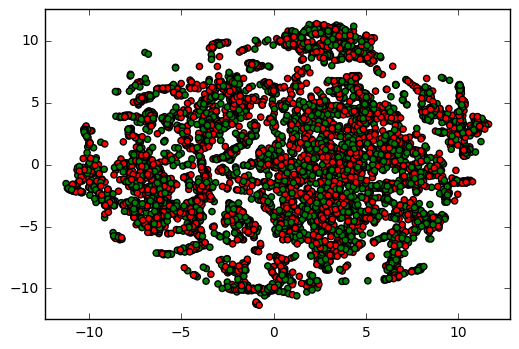

In [225]:
''' Дичь, которая хз как работает, а вообще должен быть график модели '''
from sklearn.manifold import TSNE

tsne = TSNE()
Y = tsne.fit_transform(X)

color = ['green', 'red']
plt.scatter(Y[:,0], Y[:, 1], c=color)
plt.axis('tight')
plt.show()